# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data Loading & Information

In [ ]:
df = pd.read_csv('personality_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


# Exploratory Data Analysis

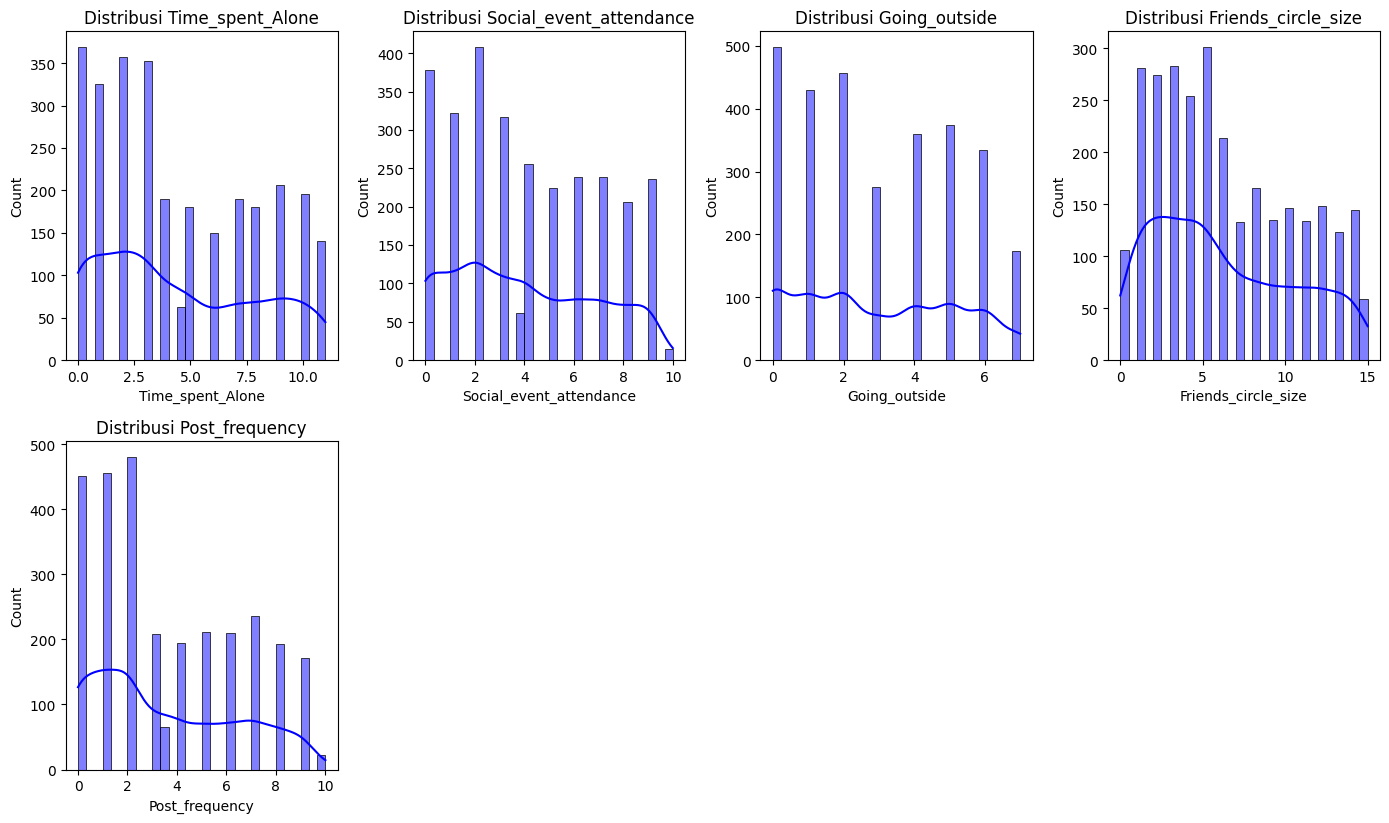

In [ ]:
# Distribution Numeric Features
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 12))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

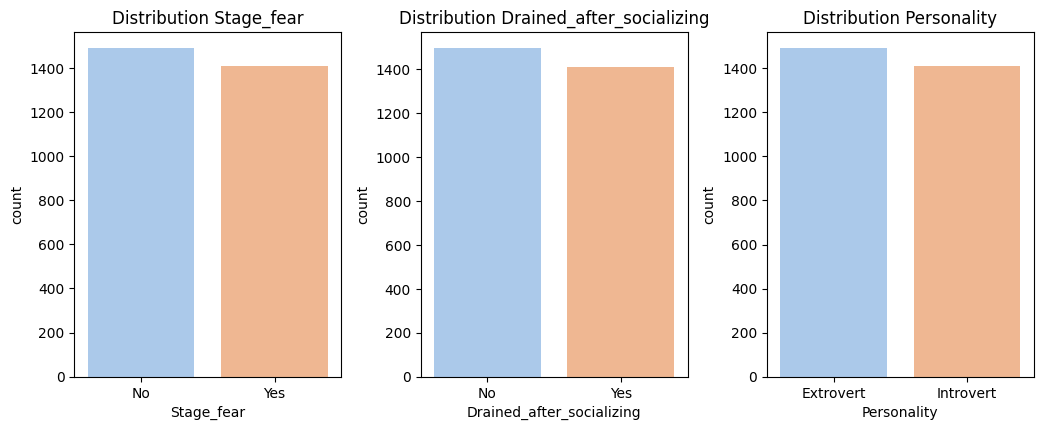

In [ ]:
# Distribution Categoric Features
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=df[column], palette='pastel')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

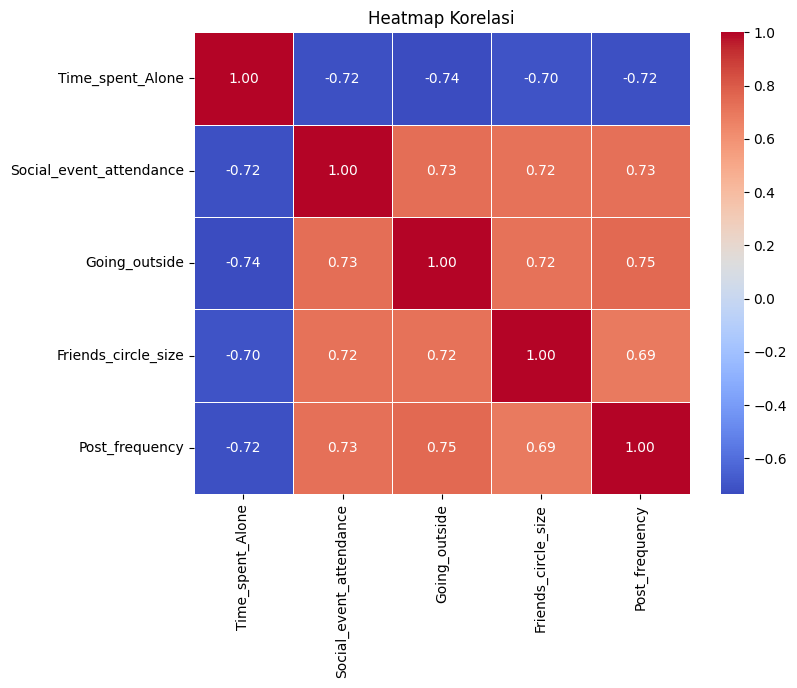

In [ ]:
# Heatmap Correlation for Numeric Features
plt.figure(figsize=(8, 6))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

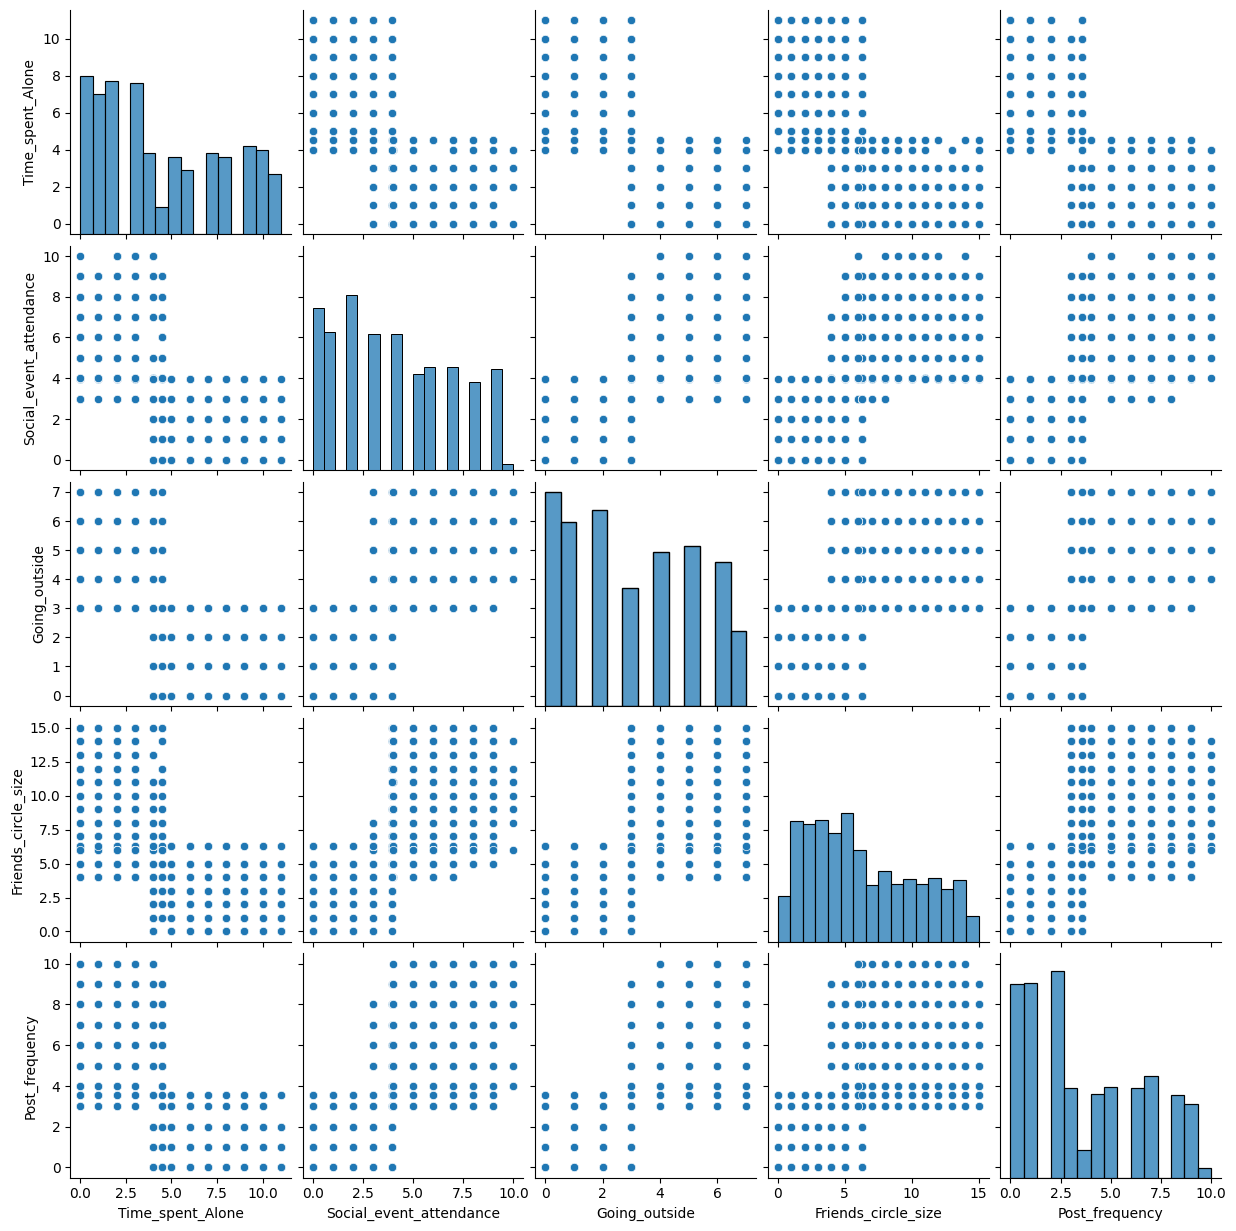

In [ ]:
# Pairplot for Numeric Features
sns.pairplot(num_features)
plt.show()

# Data Preprocessing

1. Check & Handling Missing Values

In [ ]:
# Check Total Missing Value
print(df.isnull().sum())
print(f"Total Missing Value: {df.isna().sum().sum()}")

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
Total Missing Value: 0


2. Check & Handling Duplicate Rows

In [ ]:
# Check Total Duplicate Rows
print(f"Total Duplicate Rows: {df.duplicated().sum().sum()}")

Total Duplicate Rows: 402


In [ ]:
# Handling Duplicate Rows with Drop
df = df.drop_duplicates()
print(f"Total Duplicate Rows: {df.duplicated().sum().sum()}")

Total Duplicate Rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2498 non-null   float64
 1   Stage_fear                 2498 non-null   object 
 2   Social_event_attendance    2498 non-null   float64
 3   Going_outside              2498 non-null   float64
 4   Drained_after_socializing  2498 non-null   object 
 5   Friends_circle_size        2498 non-null   float64
 6   Post_frequency             2498 non-null   float64
 7   Personality                2498 non-null   object 
dtypes: float64(5), object(3)
memory usage: 175.6+ KB


3. Check & Handling Outliers

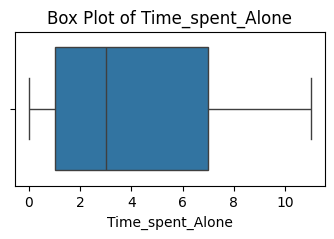

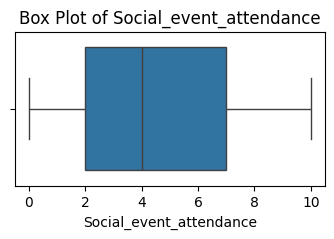

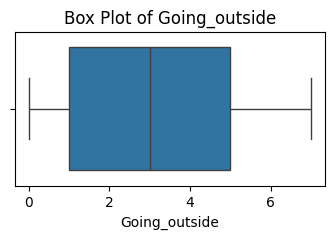

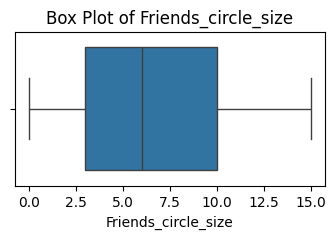

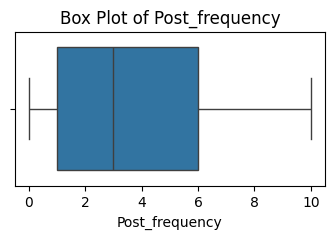

In [ ]:
numeric_features = df.select_dtypes(include = ['number']).columns

for feature in numeric_features:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

4. Data Transformation (Encoding, Scaling)


4.1 Encoding with LabelEncoder

In [ ]:
# Encode All Categorical Features to Numeric
encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


4.2 Scaling with StandardScaler

In [ ]:
scaler = MinMaxScaler()
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.363636,0,0.4,0.857143,0,0.866667,0.5,0
1,0.818182,1,0.0,0.000000,1,0.000000,0.3,1
2,0.818182,1,0.1,0.285714,1,0.333333,0.2,1
3,0.000000,0,0.6,1.000000,0,0.933333,0.8,0
4,0.272727,0,0.9,0.571429,0,0.533333,0.5,0


# Data Splitting

In [ ]:
# Split Feature (X) and Target (y)
X = df.drop(columns=['Personality'])
y = df['Personality']

# Split Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Total Data: \t",len(X))
print("Data Training: \t",len(X_train))
print("Data Testing: \t",len(X_test))

Total Data: 	 2498
Data Training: 	 1998
Data Testing: 	 500


# Model Training and Evaluation

6.1 Model Training

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=4,random_state=42).fit(X_train, y_train)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

models = {
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': svm,
    'Naive Bayes': nb
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=['Extrovert', 'Introvert'])
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': report,
        'Confusion Matrix': cm
    }

6.2 Model Evaluation

Classification Report

In [ ]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}")
    report_df = pd.DataFrame(result['Classification Report']).transpose()
    styled_df = (
        report_df.style
        .background_gradient(cmap='Blues')
        .format(precision=3)
    )
    display(styled_df)


Classification Report for KNN


,precision,recall,f1-score,support
Extrovert,0.926,0.903,0.915,279.000
Introvert,0.882,0.910,0.895,221.000
accuracy,0.906,0.906,0.906,0.906
macro avg,0.904,0.906,0.905,500.000
weighted avg,0.907,0.906,0.906,500.000



Classification Report for Decision Tree


,precision,recall,f1-score,support
Extrovert,0.933,0.900,0.916,279.000
Introvert,0.879,0.919,0.898,221.000
accuracy,0.908,0.908,0.908,0.908
macro avg,0.906,0.909,0.907,500.000
weighted avg,0.909,0.908,0.908,500.000



Classification Report for Random Forest


,precision,recall,f1-score,support
Extrovert,0.933,0.900,0.916,279.000
Introvert,0.879,0.919,0.898,221.000
accuracy,0.908,0.908,0.908,0.908
macro avg,0.906,0.909,0.907,500.000
weighted avg,0.909,0.908,0.908,500.000



Classification Report for SVM


,precision,recall,f1-score,support
Extrovert,0.930,0.900,0.914,279.000
Introvert,0.878,0.914,0.896,221.000
accuracy,0.906,0.906,0.906,0.906
macro avg,0.904,0.907,0.905,500.000
weighted avg,0.907,0.906,0.906,500.000



Classification Report for Naive Bayes


,precision,recall,f1-score,support
Extrovert,0.933,0.900,0.916,279.000
Introvert,0.879,0.919,0.898,221.000
accuracy,0.908,0.908,0.908,0.908
macro avg,0.906,0.909,0.907,500.000
weighted avg,0.909,0.908,0.908,500.000


Confusion Matrix

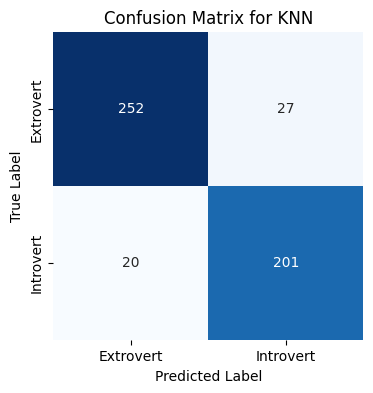

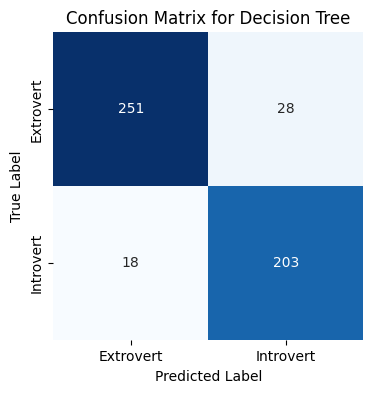

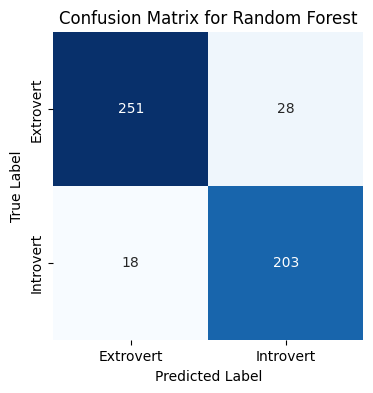

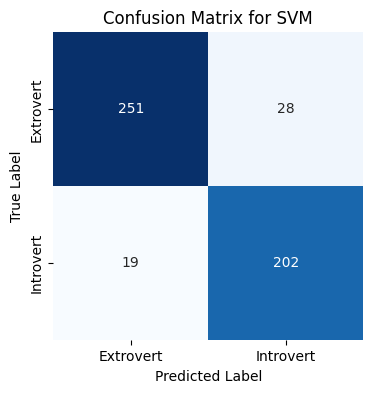

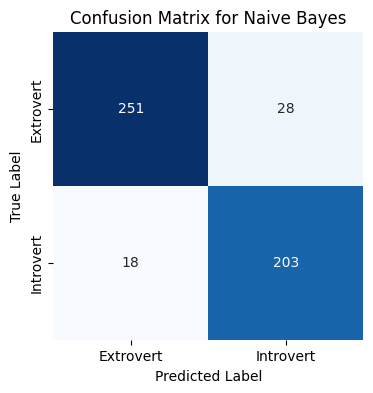

In [ ]:
class_names = ['Extrovert', 'Introvert']

for model_name, result in results.items():
    cm = result['Confusion Matrix']
    plt.figure(figsize=(4, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

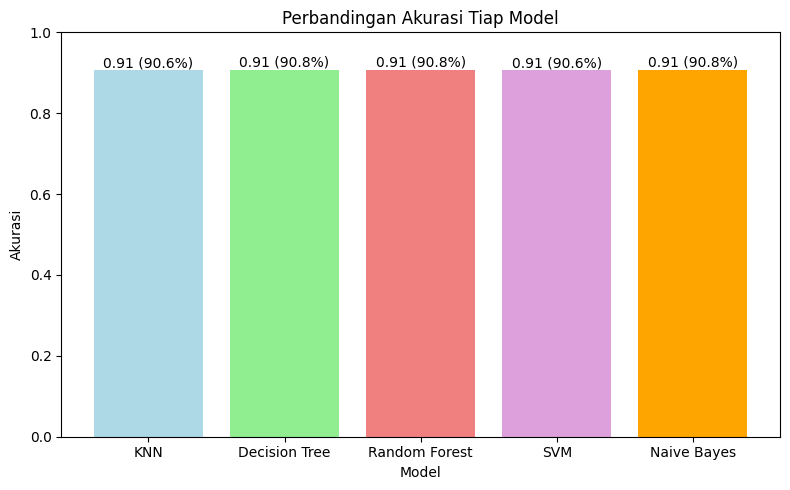

In [ ]:
accuracies = {model: result['Accuracy'] for model, result in results.items()}

plt.figure(figsize=(8,5))
bars = plt.bar(list(accuracies.keys()), list(accuracies.values()),
               color=['lightblue', 'lightgreen', 'lightcoral', 'plum', 'orange', 'gray'])

for bar in bars:
    accuracy = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        accuracy,
        f'{accuracy:.2f} ({accuracy * 100:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Perbandingan Akurasi Tiap Model")
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Overfitting Underfitting Detection

7.1 Detection with Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

for model_name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    print(f"{model_name}:")
    print(f"Training MSE : {train_mse:.4f}")
    print(f"Testing MSE  : {test_mse:.4f}")

    if abs(train_mse - test_mse) > 0.05 and train_mse < test_mse:
        print("⚠️ Overfitting\n")
    elif train_mse > 0.5 and test_mse > 0.5:
        print("⚠️ Underfitting\n")
    else:
        print("✅ Good Fit\n")

KNN:
Training MSE : 0.0681
Testing MSE  : 0.0940
✅ Good Fit

Decision Tree:
Training MSE : 0.0686
Testing MSE  : 0.0920
✅ Good Fit

Random Forest:
Training MSE : 0.0686
Testing MSE  : 0.0920
✅ Good Fit

SVM:
Training MSE : 0.0686
Testing MSE  : 0.0940
✅ Good Fit

Naive Bayes:
Training MSE : 0.0686
Testing MSE  : 0.0920
✅ Good Fit



In [ ]:
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} - Mean CV Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

KNN - Mean CV Accuracy: 0.92 ± 0.02
Decision Tree - Mean CV Accuracy: 0.91 ± 0.01
Random Forest - Mean CV Accuracy: 0.93 ± 0.03
SVM - Mean CV Accuracy: 0.93 ± 0.03
Naive Bayes - Mean CV Accuracy: 0.93 ± 0.03


# Invers & Saving Model

7.1 Invers Columns

In [ ]:
# Invers Numerical Columns
cols_to_scale = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df[cols_to_scale] = scaler.inverse_transform(df[cols_to_scale])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [ ]:
# Invers Categorical Columns
for col in categorical_cols:
    df[col] = encoders[col].inverse_transform(df[col])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


7.2 Saving Model

In [ ]:
joblib.dump({
    'model': rf,
    'encoders': encoders
}, 'extrovert_introvert_model.pkl')

['extrovert_introvert_model.pkl']

# Testing Model with New Data

In [ ]:
data = joblib.load('extrovert_introvert_model.pkl')
model = data['model']
encoders = data['encoders']

new_data = pd.DataFrame([
    {
        'Time_spent_Alone': 9,
        'Stage_fear': 'Yes',
        'Social_event_attendance': 0,
        'Going_outside': 0,
        'Drained_after_socializing': 'Yes',
        'Friends_circle_size': 5,
        'Post_frequency': 3
    },
    {
        'Time_spent_Alone': 1,
        'Stage_fear': 'No',
        'Social_event_attendance': 10,
        'Going_outside': 8,
        'Drained_after_socializing': 'No',
        'Friends_circle_size': 20,
        'Post_frequency': 15
    },
    {
        'Time_spent_Alone': 5,
        'Stage_fear': 'No',
        'Social_event_attendance': 5,
        'Going_outside': 4,
        'Drained_after_socializing': 'Yes',
        'Friends_circle_size': 10,
        'Post_frequency': 7
    }
])

for col, le in encoders.items():
    if col in new_data.columns:
        new_data[col] = le.transform(new_data[col])

preds = model.predict(new_data)

hasil = encoders['Personality'].inverse_transform(preds)
for i, h in enumerate(hasil, start=1):
    print(f"Hasil Prediksi Data {i}: {h}")

Hasil Prediksi Data 1: Introvert
Hasil Prediksi Data 2: Extrovert
Hasil Prediksi Data 3: Extrovert
